#  Analytical Solution


## **Unperturbed Green's Function**


In [1]:
import numpy as np

from GreenFunctions_MTI import GMTI_modifiedBC, GMTI_analytical, parameters, GMTI_normalBC
from GreenFunctions_SC import GSC, GSC_matrix, FSC, FSC_matrix

# Hamiltonian parameters
params=dict(C0 = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M0 = 0.28, B1 = 10, B2 = 56.6)

# parameters
L = 0.010; omega = 0.0025
# z range
d = 100.; Z = np.linspace(0., d, 250)

# Green's function computed analytical
gfzZ = np.array([GMTI_analytical(d=d, z=z, Z=z, L=L, omega=omega) for z in Z])
# Green's function solved with exponential and modified B.C.
gfexact = np.array([GMTI_modifiedBC(d=d, z=z, Z=z, kx=0., ky=0., L=L, w=omega) for z in Z])

# z' fixed point
zp = 32.5
# Green's function computed analytical
gfz_Zfixed = np.array([GMTI_analytical(d=d, z=z, Z=zp, L=L, omega=omega) for z in Z])
# Green's function solved with exponential and modified B.C.
gfexact_Zfixed = np.array([GMTI_modifiedBC(d=d, z=z, Z=zp, kx=0., ky=0., L=L, w=omega) for z in Z])

# z fixed point
zp = 58.1
# Green's function computed analytical
gfz_zfixed = np.array([GMTI_analytical(d=d, z=zp, Z=z, L=L, omega=omega) for z in Z])
# Green's function solved with exponential and modified B.C.
gfexact_zfixed = np.array([GMTI_modifiedBC(d=d, z=zp, Z=z, kx=0., ky=0., L=L, w=omega) for z in Z])

### <font> Green's Function for $z=z'$ </font> 
We plot here the Green's function $\mathcal{G}^{(0)}(z,z;\omega)$ as a function of the out-of-plane coordinate $z$ and with $z'=z$.

#### <font color='green'> **Real Part** </font> 

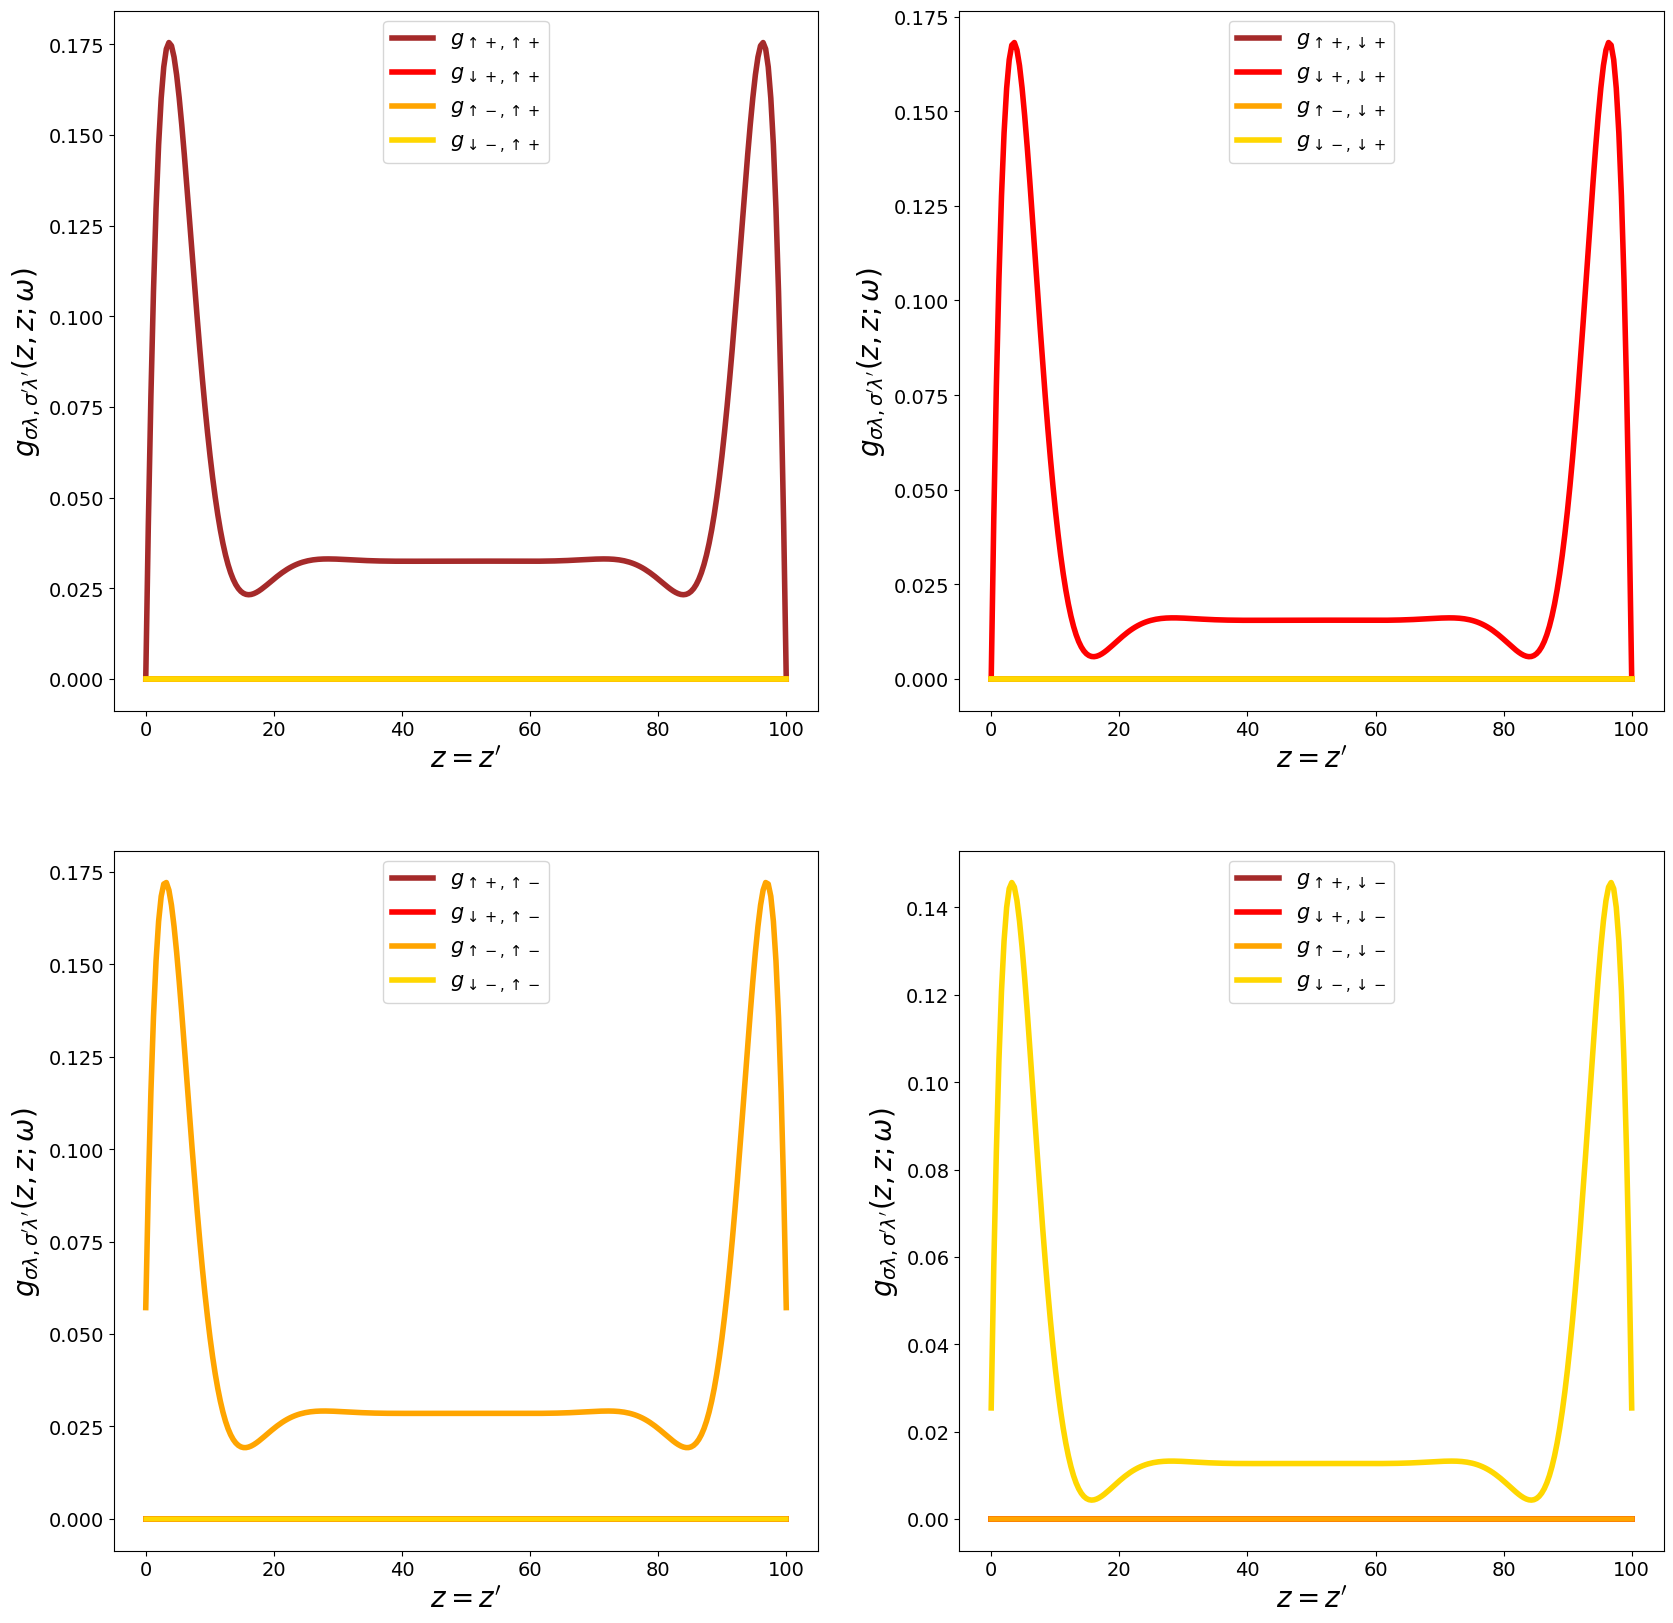

In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

#plt.style.use(['default', './paper.mplstyle'])

# colors for plotting
colors = ['brown', 'red', 'orange', 'gold']
# labels for curves
labels = [["$g_{\\uparrow +, \\uparrow +}$", "$g_{\\uparrow +, \downarrow +}$", "$g_{\\uparrow +, \\uparrow -}$", "$g_{\\uparrow +, \downarrow -}$"],
          ["$g_{\downarrow +, \\uparrow +}$", "$g_{\downarrow +, \downarrow +}$", "$g_{\downarrow +, \\uparrow -}$", "$g_{\downarrow +, \downarrow -}$"],
          ["$g_{\\uparrow -, \\uparrow +}$", "$g_{\\uparrow -, \downarrow +}$", "$g_{\\uparrow -, \\uparrow -}$", "$g_{\\uparrow -, \downarrow -}$"],
          ["$g_{\downarrow -, \\uparrow +}$", "$g_{\downarrow -, \downarrow +}$", "$g_{\downarrow -, \\uparrow -}$", "$g_{\downarrow -, \downarrow -}$"]]


# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):
        
        # lambda_i, gamma_i parameters
        #lambda1, lambda2, gamma1, gamma2 = parameters(irow=irow, icol=icol, L=L, omega=omega)
        #print(lambda1, lambda2)
        
        # plot the Green's function
        axs[iPic][jPic].plot(Z, [gfzZ[idx][irow][icol].real for idx in range(len(Z))], c=colors[irow], ls='solid', lw=4, label=labels[irow][icol])
       
        # plot the exact numerical result
        #if irow == icol:
            #axs[iPic][jPic].plot(Z, [gfexact[idx][irow][icol].real for idx in range(len(Z))], c='black', lw=3, ls=':')

    
    axs[iPic][jPic].set_xlabel("$z=z'$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

#### <font color='green'> **Imaginary Part** </font> 

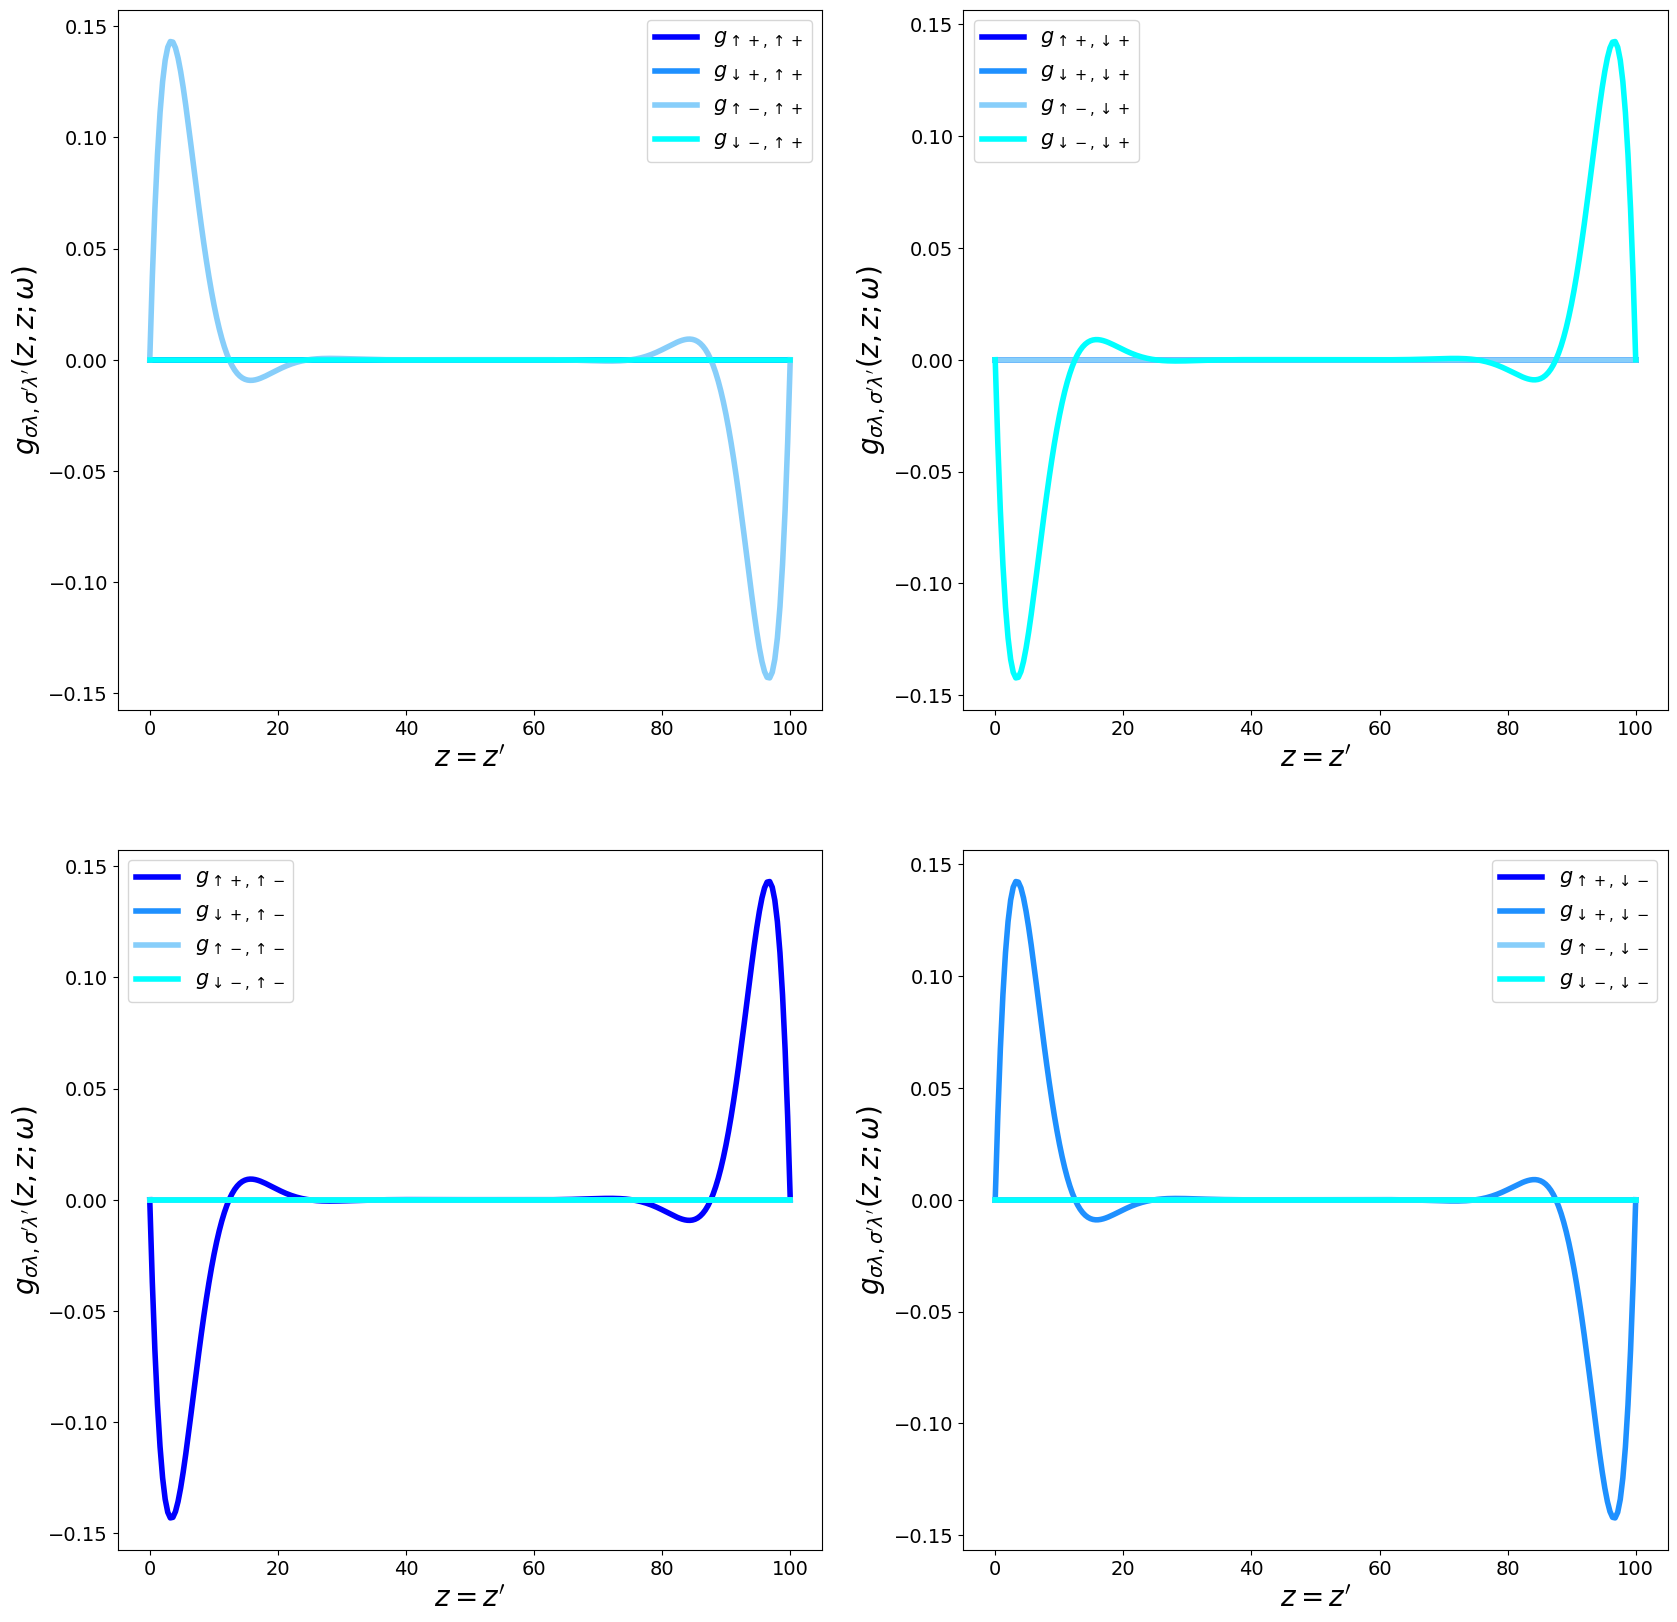

In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

# colors for plotting
colors = ['blue','dodgerblue','lightskyblue','cyan']
# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):
        # plot the Green's function
        axs[iPic][jPic].plot(Z, [gfzZ[idx][irow][icol].imag for idx in range(len(Z))], c=colors[irow], lw=4, label=labels[irow][icol])
        #axs[iPic][jPic].plot(Z, [gfHc[idx][irow][icol].imag for idx in range(len(Z))], c=colors[irow], ls=':', lw=4, label=labels[irow][icol])
        #axs[iPic][jPic].plot(Z, [gfminw[idx][irow][icol].imag for idx in range(len(Z))], c=colors[irow], ls=':', lw=4, label=labels[irow][icol])
    
        # plot the numerical result
        #if irow == icol+2 or irow == icol-2:
            #axs[iPic][jPic].plot(Z, [gfexact[idx][irow][icol].imag for idx in range(len(Z))], c='black', lw=3, ls=':')
            
    axs[iPic][jPic].set_xlabel("$z=z'$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

### <font> Green's Function versus $z$ </font> 
We plot here the Green's function $\mathcal{G}^{(0)}(z,z';\omega)$ as a function of the out-of-plane coordinate $z$ for a fixed $z'$.

#### <font color='green'> **Real Part** </font> 

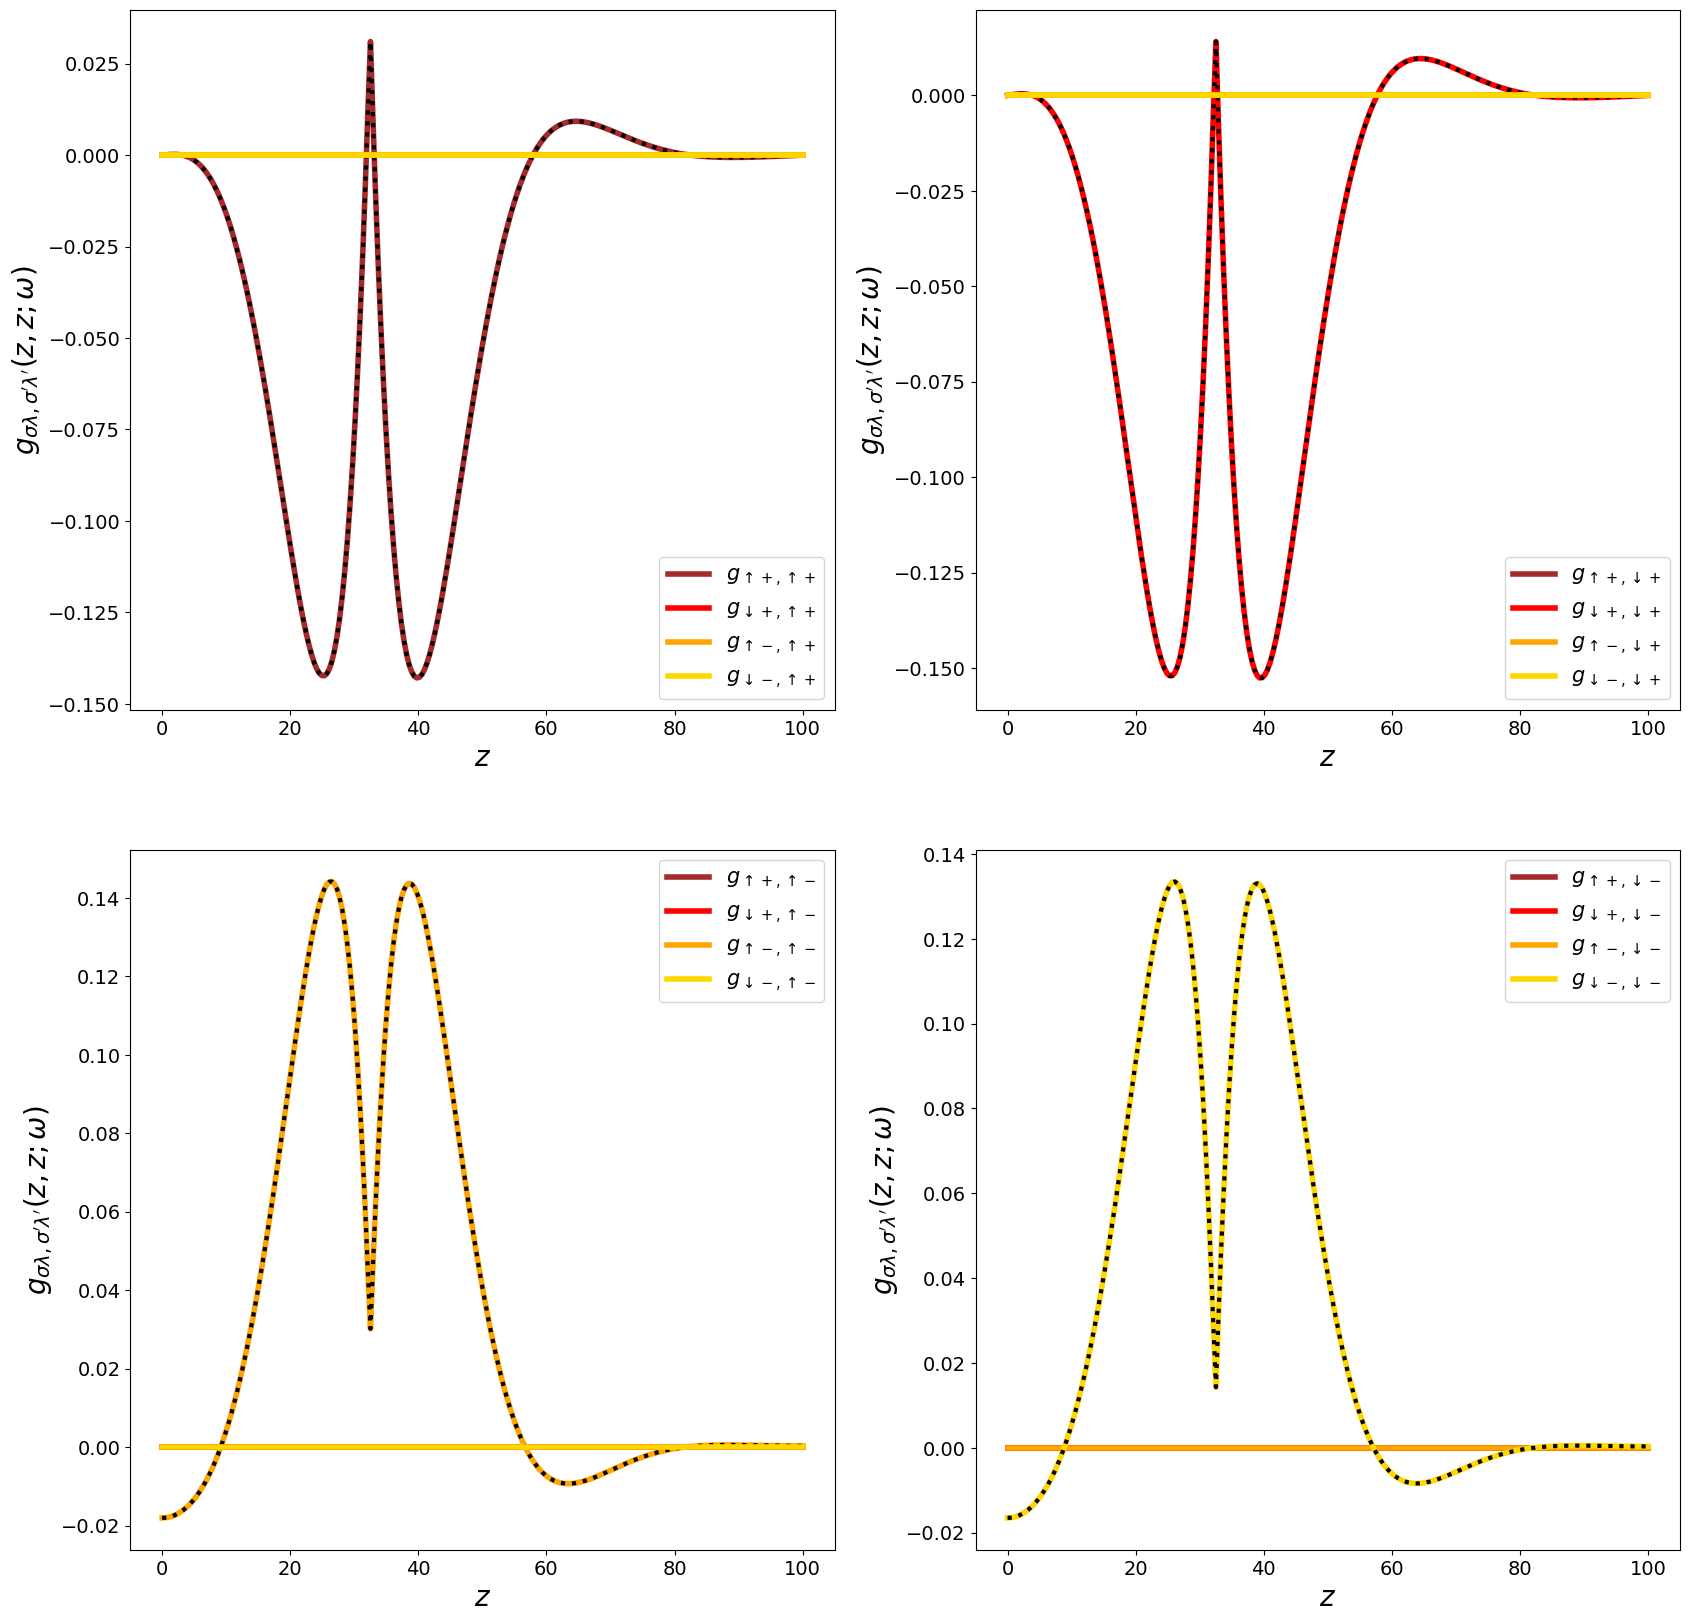

In [4]:
# colors for plotting
colors = ['brown', 'red', 'orange', 'gold']
# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):
        # plot the Green's function
        axs[iPic][jPic].plot(Z, [gfz_Zfixed[idx][irow][icol].real for idx in range(len(Z))], c=colors[irow], lw=4, label=labels[irow][icol])
               
        # plot the exact numerical result
        if irow == icol:
            axs[iPic][jPic].plot(Z, [gfexact_Zfixed[idx][irow][icol].real for idx in range(len(Z))], c='black', lw=3, ls=':')
    
    axs[iPic][jPic].set_xlabel("$z$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

#### <font color='green'> **Imaginary Part** </font> 

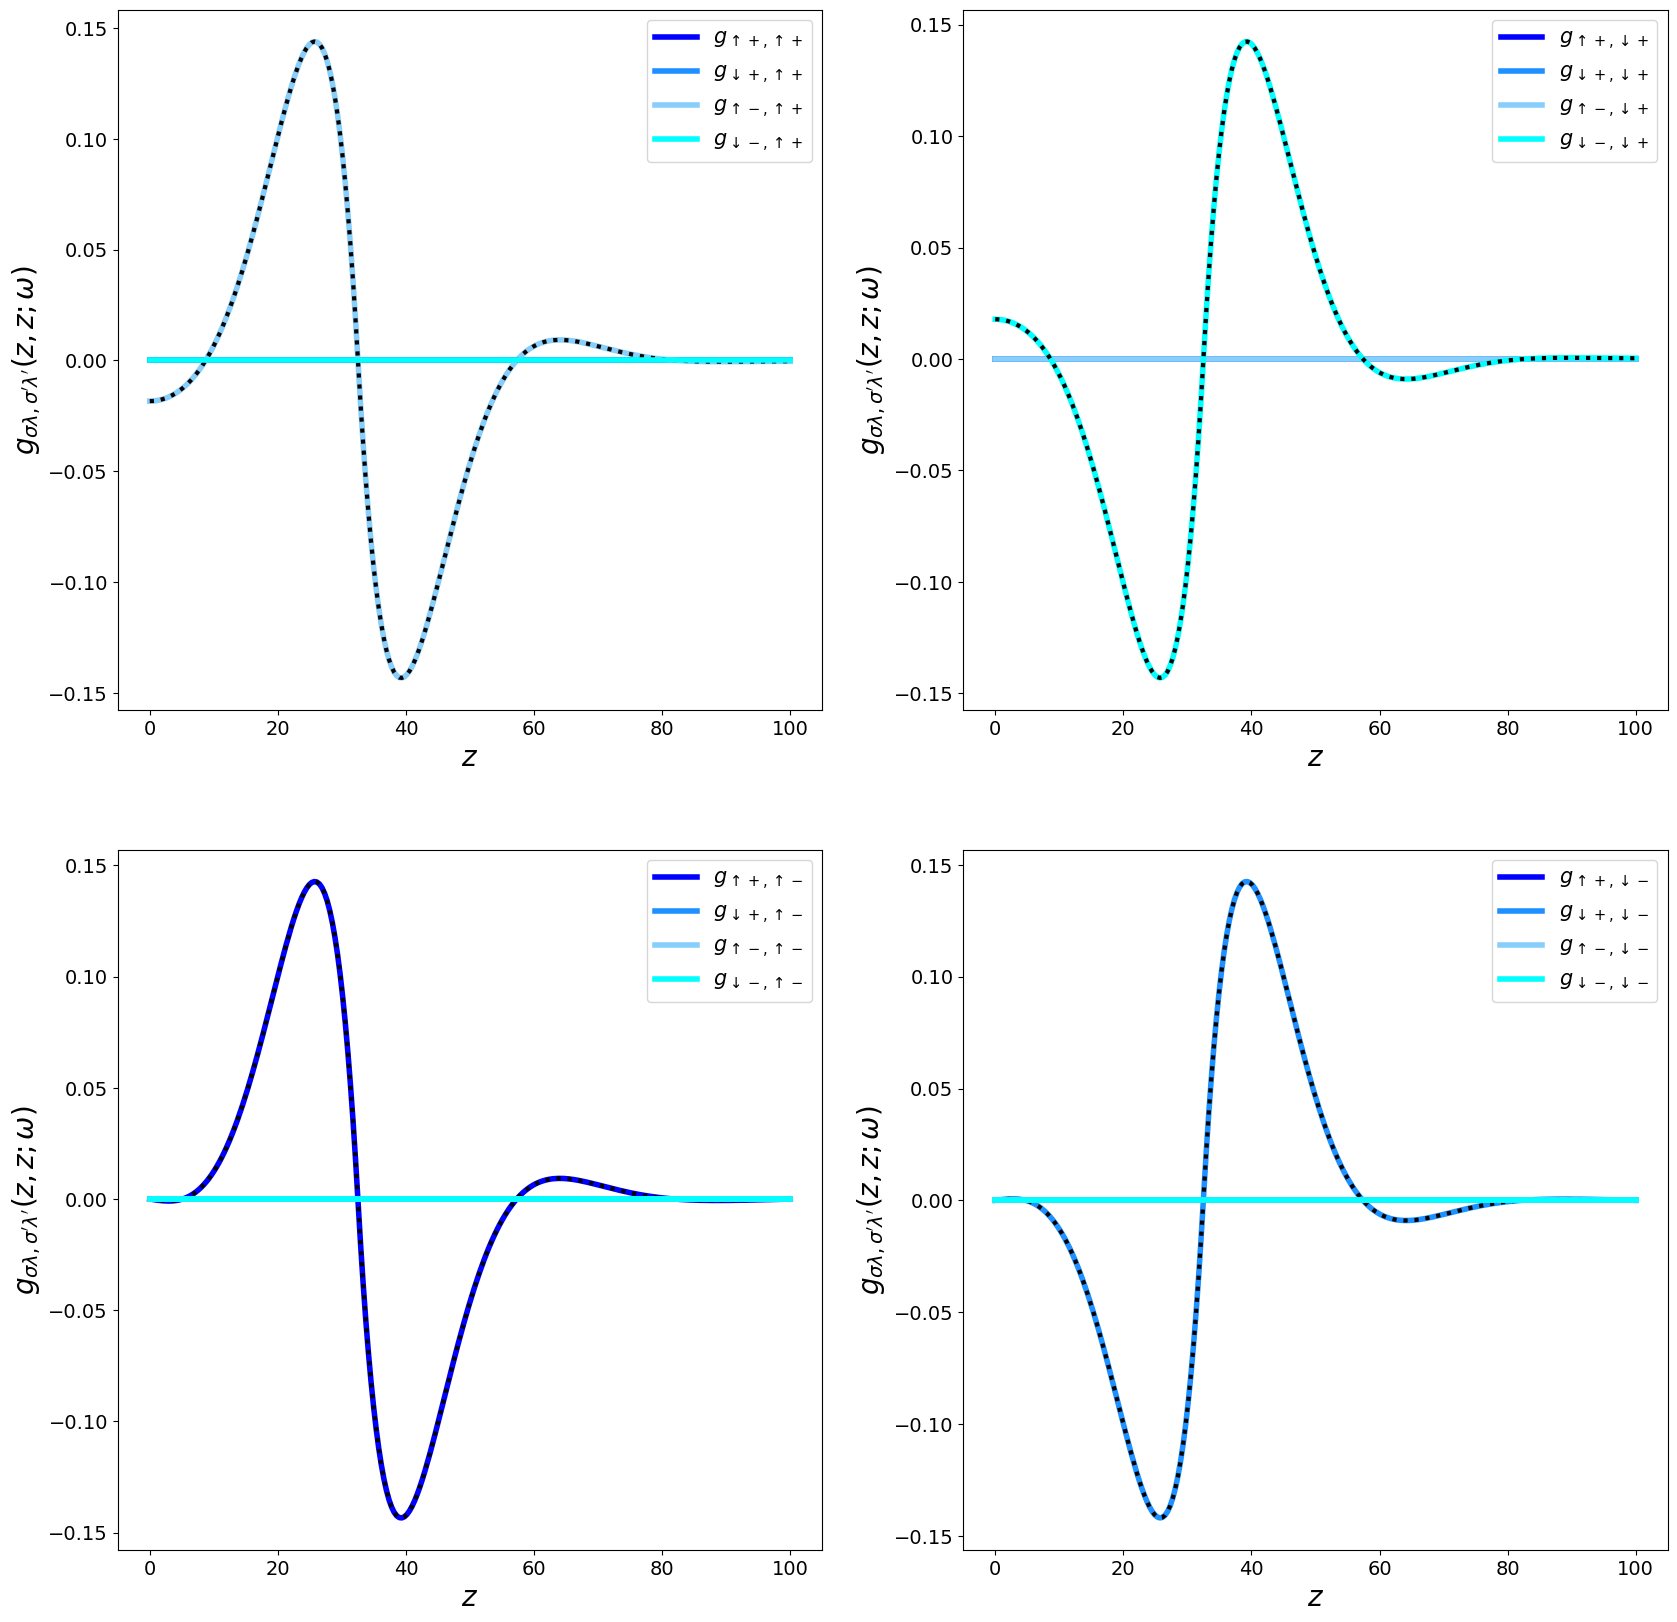

In [5]:
# colors for plotting
colors = ['blue','dodgerblue','lightskyblue','cyan']
# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):
        # plot the Green's function
        axs[iPic][jPic].plot(Z, [gfz_Zfixed[idx][irow][icol].imag for idx in range(len(Z))], c=colors[irow], lw=4, label=labels[irow][icol])
               
        # plot the exact numerical result
        if irow == icol+2 or irow == icol-2:
            axs[iPic][jPic].plot(Z, [gfexact_Zfixed[idx][irow][icol].imag for idx in range(len(Z))], c='black', lw=3, ls=':')
    
    axs[iPic][jPic].set_xlabel("$z$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

### <font> Green's Function versus $z'$ </font> 
We plot here the Green's function $\mathcal{G}^{(0)}(z,z';\omega)$ as a function of the out-of-plane coordinate $z'$ for a fixed $z$.

#### <font color='green'> **Real Part** </font> 

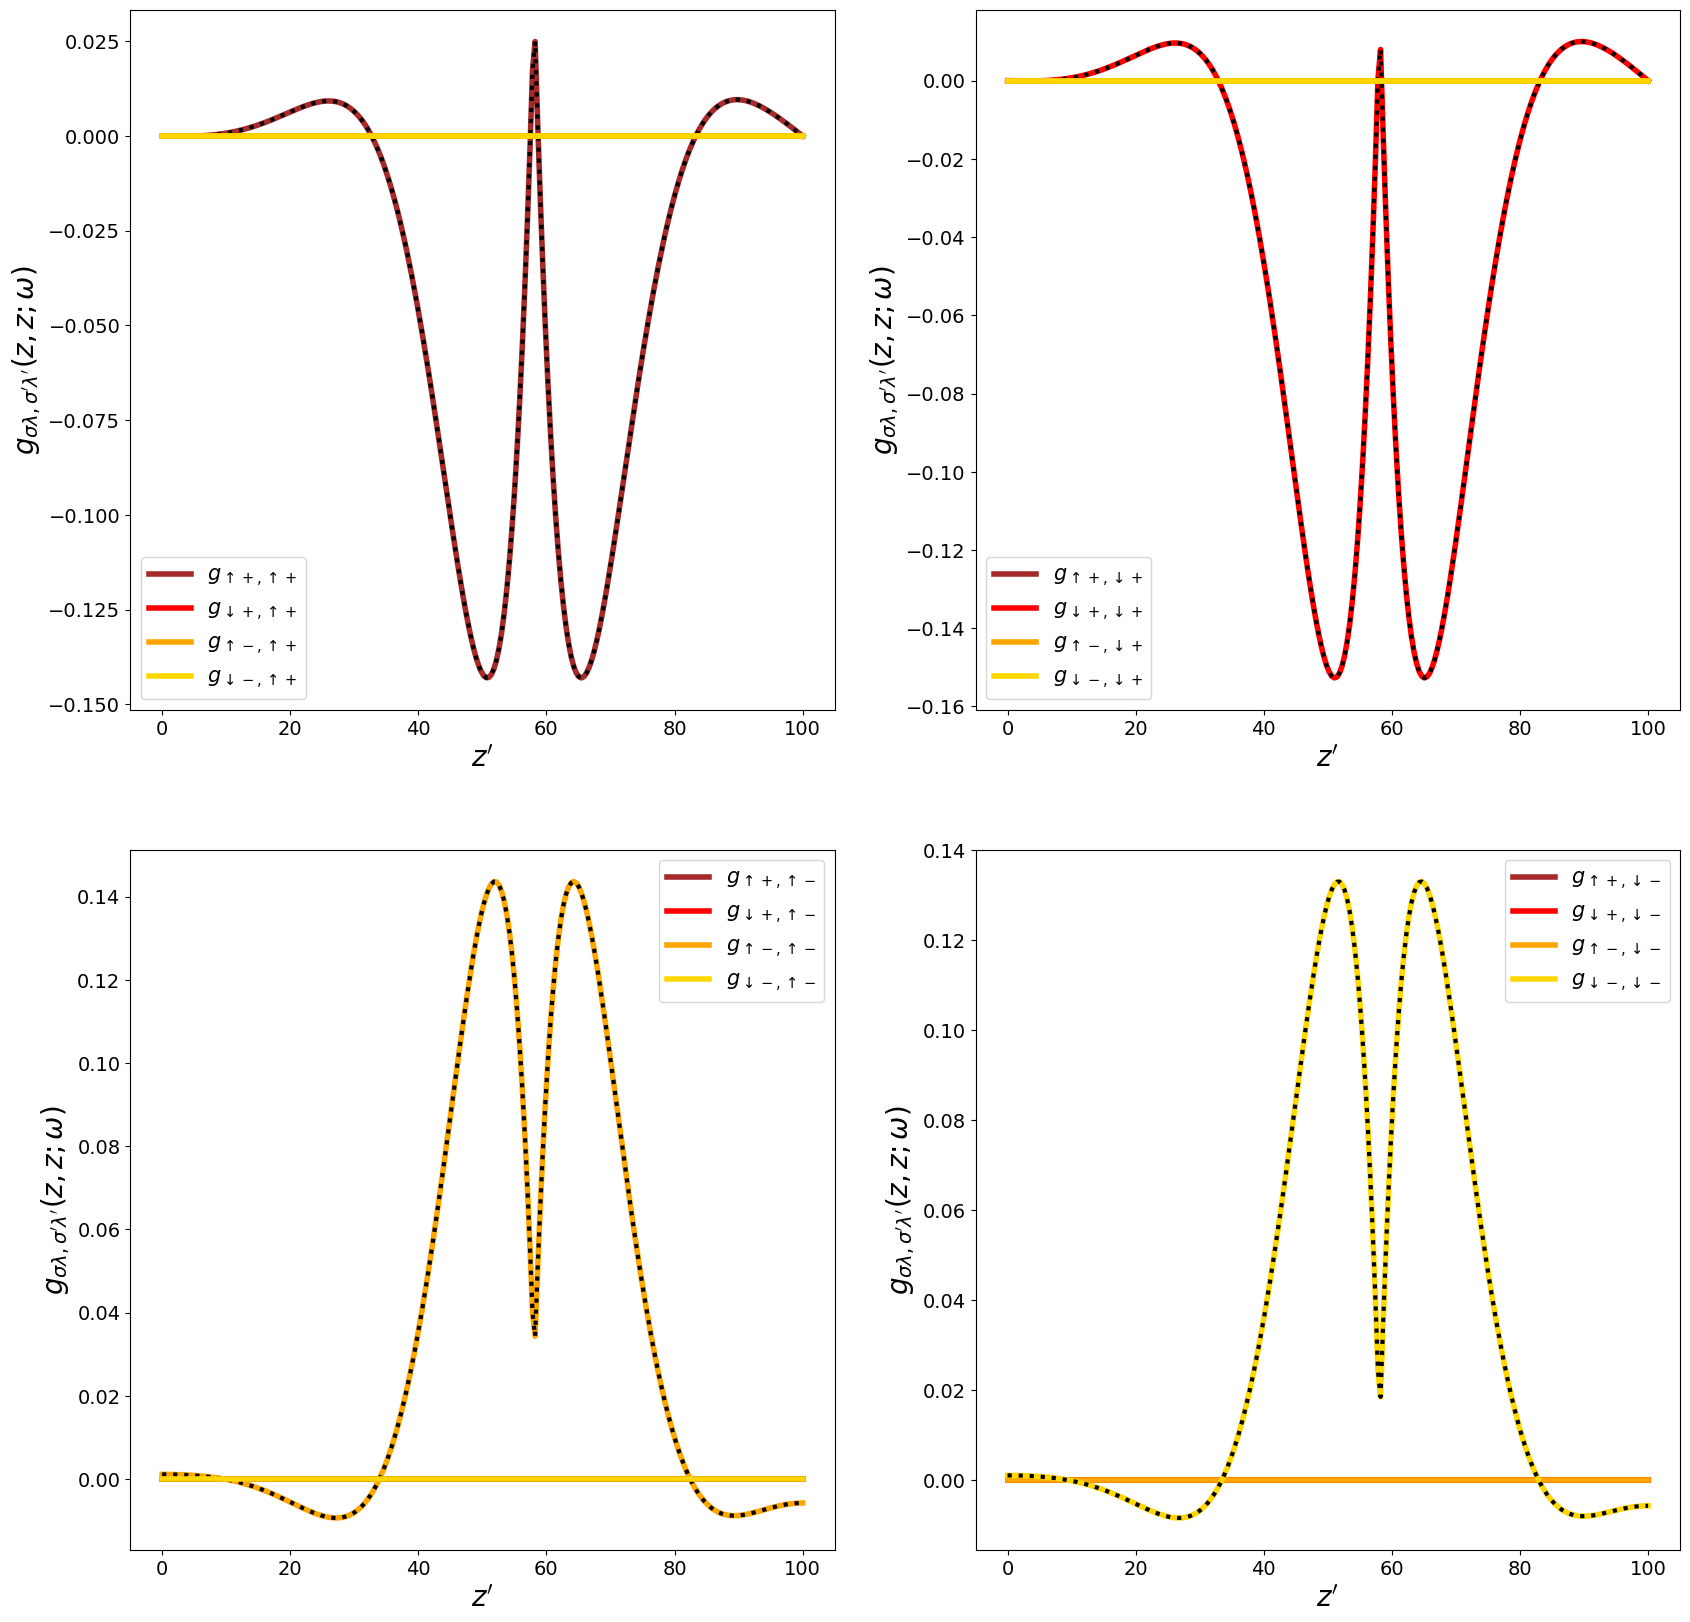

In [6]:
# colors for plotting
colors = ['brown', 'red', 'orange', 'gold']
# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):
        # plot the Green's function
        axs[iPic][jPic].plot(Z, [gfz_zfixed[idx][irow][icol].real for idx in range(len(Z))], c=colors[irow], lw=4, label=labels[irow][icol])
               
        # plot the exact numerical result
        if irow == icol:
            axs[iPic][jPic].plot(Z, [gfexact_zfixed[idx][irow][icol].real for idx in range(len(Z))], c='black', lw=3, ls=':')
    
    axs[iPic][jPic].set_xlabel("$z'$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

#### <font color='green'> **Imaginary Part** </font> 

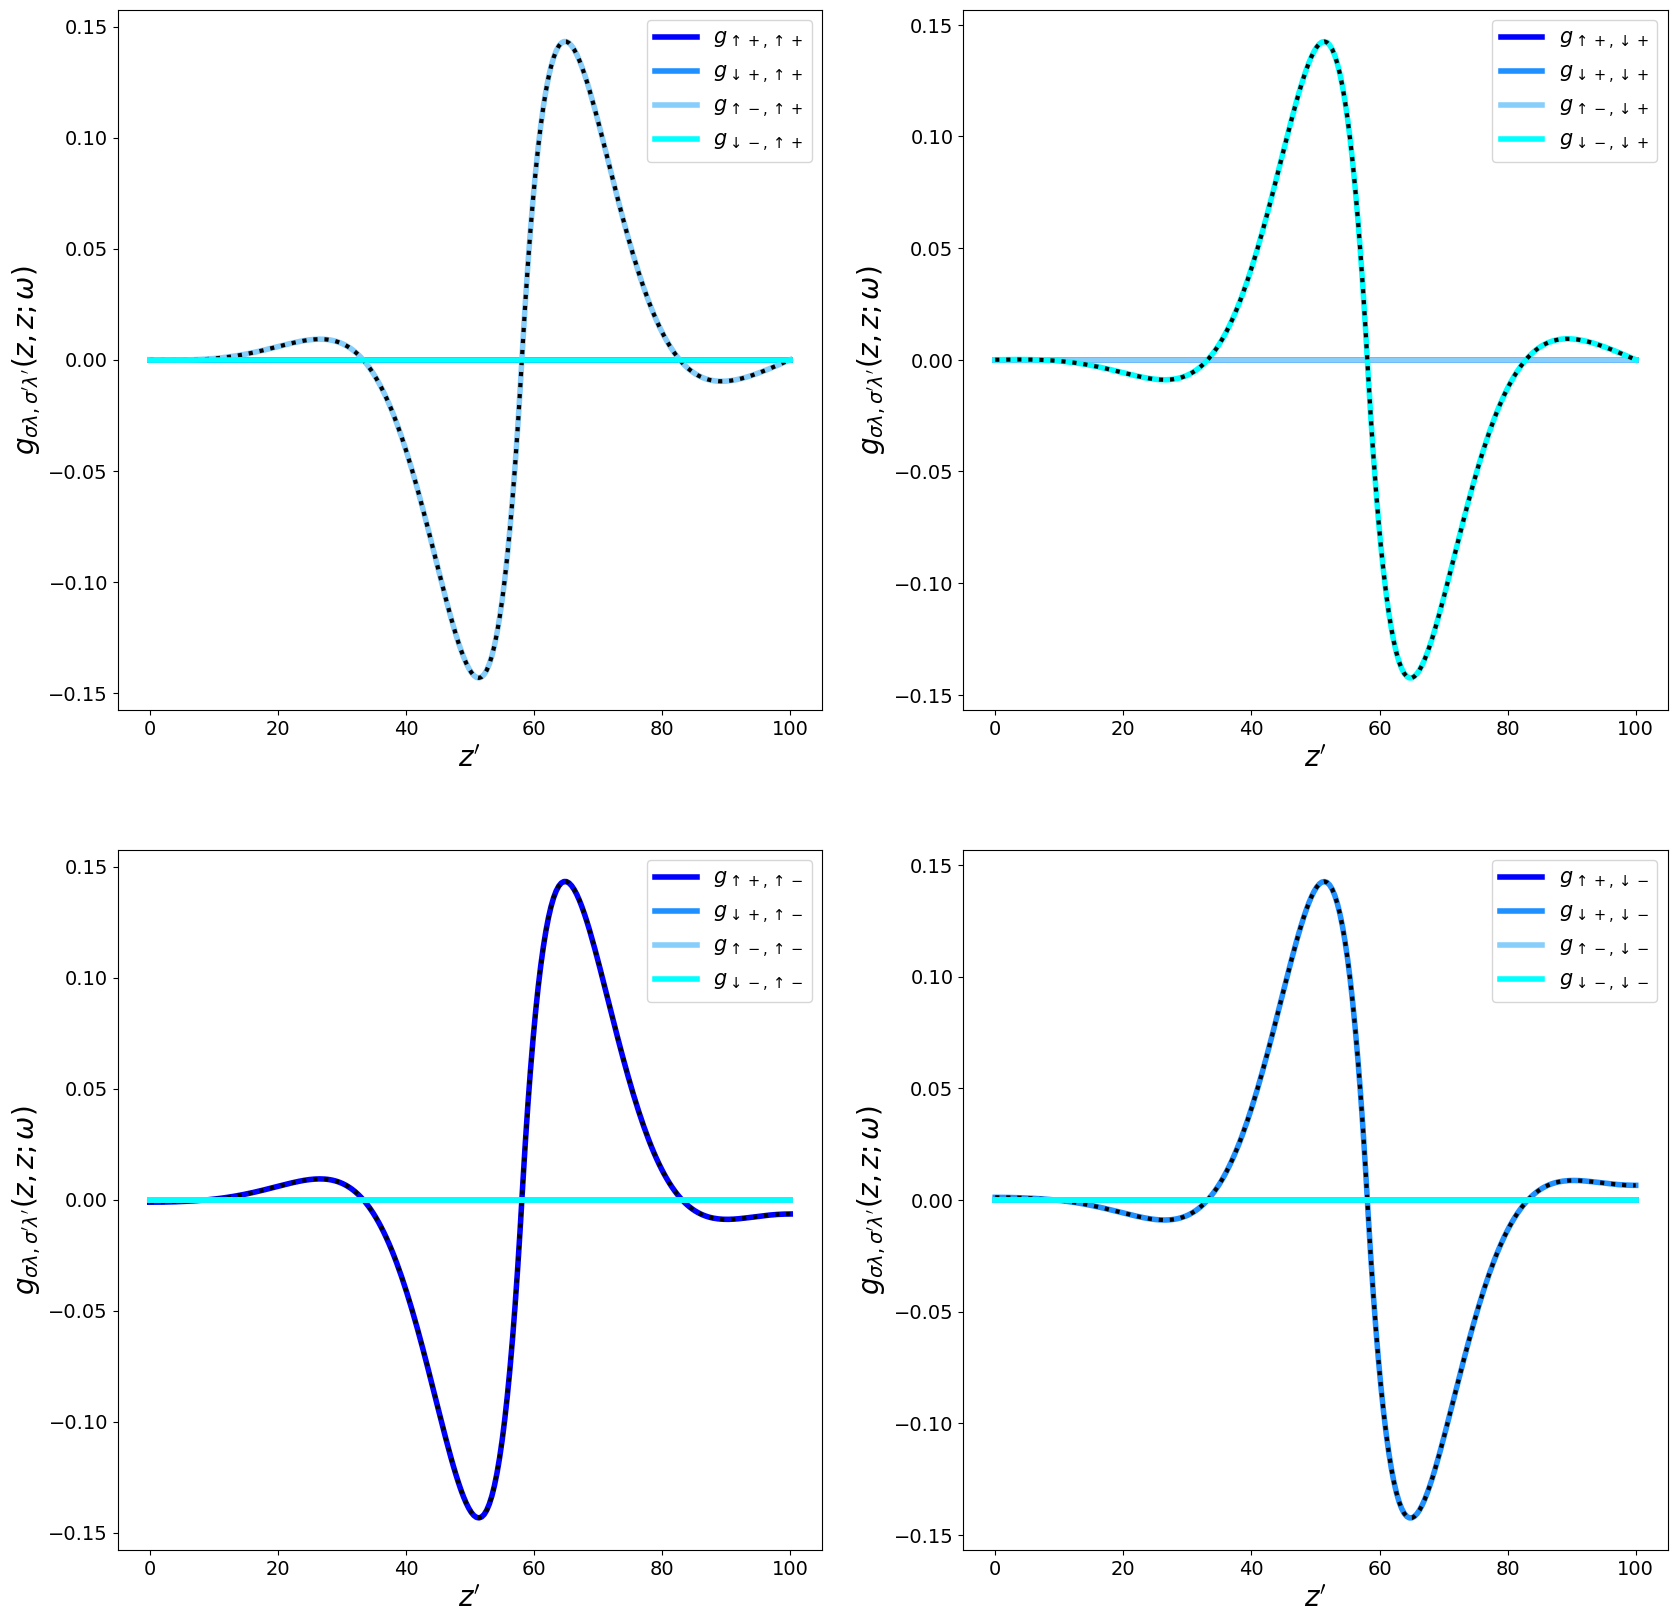

In [7]:
# colors for plotting
colors = ['blue','dodgerblue','lightskyblue','cyan']
# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):
        # plot the Green's function
        axs[iPic][jPic].plot(Z, [gfz_zfixed[idx][irow][icol].imag for idx in range(len(Z))], c=colors[irow], lw=4, label=labels[irow][icol])
               
        # plot the exact numerical result
        if irow == icol+2 or irow == icol-2:
            axs[iPic][jPic].plot(Z, [gfexact_zfixed[idx][irow][icol].imag for idx in range(len(Z))], c='black', lw=3, ls=':')
    
    axs[iPic][jPic].set_xlabel("$z'$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

## **Second-order Correction**

In order to evaluate the second order corrections to the MTI Green's functions, we need to make some specific assumption on the spatial dependence of the coupling functions $\gamma_{\sigma \lambda}^{\sigma'}(z,z') \equiv \gamma_{\sigma \lambda}^{\sigma'} f(z,z')$.
In the following, we model the tunneling at the interface $z=z_0$ as
$$
    f(z,z') = \gamma_{\sigma \lambda}^{\sigma'} \,
    \delta(z-z') \tilde{f}(z-z_0)  \,,
$$
which means that the tunneling occurs only between electrons at the same position $z=z'$, and the function $\tilde{f}$ is the tunneling amplitude for electron at distance $|z-z_0|$ from the interface.
Here we assume $\tilde{f}(z-z_0) = \delta(z-z_0)$, such that the tunneling occurs only at the interface $z=z_0$, which physically corresponds to the interface between the two materials.
Furthermore, we assume that the tunneling occurs only between electrons with the same spin and is independent of the parity index, i.e. $\gamma_{\sigma \lambda}^{\sigma'} = \gamma \delta_{\sigma\sigma'}$.



### **Normal Green's function**
With the above assumption on the tunneling coupling, the second-order correction to the normal Green's function becomes
$$
\begin{split}
    \mathcal{G}_{MTI}^{(2)}(z,z'; \omega)
    &=
    \int dz_1 \, dz_1' \, dz_2 \, dz_2' \;
    \mathcal{G}_{MTI}^{(0)}(z, z_1; \omega) \,
    \Gamma(z_1,z_1') \,
    \mathcal{G}_{SC}^{(0)}(z_1',z_2'; \omega) \,
    \Gamma^{\dagger}(z_2',z_2) \,
    \mathcal{G}_{MTI}^{(0)}(z_2, z'; \omega) = \\[5pt]
    %
    &=
    \int dz_1 \, dz_1' \, dz_2 \, dz_2' \;
    \delta(z_1-z_1') \delta(z_1-z_0) \delta(z_2-z_2') \delta(z_2-z_0) \,
    \mathcal{G}_{MTI}^{(0)}(z, z_1; \omega) \,
    \Gamma \,
    \mathcal{G}_{SC}^{(0)}(z_1',z_2'; \omega) \,
    \Gamma^{\dagger} \,
    \mathcal{G}_{MTI}^{(0)}(z_2, z'; \omega) = \\[5pt]
    %
    &=
    \int dz_1 \, dz_2 \;
    \delta(z_1-z_0)  \delta(z_2-z_0)\,
    \mathcal{G}_{MTI}^{(0)}(z, z_1; \omega) \,
    \Gamma \,
    \mathcal{G}_{SC}^{(0)}(z_1,z_2; \omega) \,
    \Gamma^{\dagger} \,
    \mathcal{G}_{MTI}^{(0)}(z_2, z'; \omega) = \\[5pt]
    %
    &=
    \mathcal{G}_{MTI}^{(0)}(z, z_0; \omega) \,
    \Gamma \,
    \mathcal{G}_{SC}^{(0)}(0; \omega) \,
    \Gamma^{\dagger} \,
    \mathcal{G}_{MTI}^{(0)}(z_0, z'; \omega) \,,
\end{split}
$$
where it is worth noting that in general the unperturbed Green's functions $\mathcal{G}_{MTI}^{(0)}(z, z_0; \omega)$ and $\mathcal{G}_{MTI}^{(0)}(z_0, z'; \omega)$ are non-vanishing for $z_0=0$ and $z_0=d$ with the chosen boundary conditions.
Therefore, the second order correction for the normal propagator reduces to the matrix product 
$$
\boxed{
    \mathcal{G}_{MTI}^{(2)}(z,z'; \omega)
    = 
    \mathcal{G}_{MTI}^{(0)}(z, z_0; \omega) \,
    \Gamma \,
    \mathcal{G}_{SC}^{(0)}(0; \omega) \,
    \Gamma^{\dagger} \,
    \mathcal{G}_{MTI}^{(0)}(z_0, z'; \omega)
} \,.
$$

In [8]:
# Function evaluating the G2 with analytical formula
def GMTI2_analytical(d, z, Z, z0, L, mu, Delta, omega, Gamma, C0 = -0.0068, D1 = 1.3, A1 = 2.2, M0 = 0.28, B1 = 10, t=1., hbar = 1.):

    # GMTI(z,z0)
    GMTIz = GMTI_analytical(d=d, z=z, Z=z0, L=L, omega=omega, C0=C0, D1=D1, A1=A1, M0=M0, B1=B1, hbar=hbar)
    
    # GMTI(z0,z')
    GMTIZ = GMTI_analytical(d=d, z=z0, Z=Z, L=L, omega=omega, C0=C0, D1=D1, A1=A1, M0=M0, B1=B1, hbar=hbar)
    
    # GSC(0)
    GSC = GSC_matrix(z=0., kx=0., ky=0., mu=mu, Delta=Delta, w=omega, t=t, hbar=hbar)
    
    return (GMTIz @ Gamma @ GSC @ Gamma.H @ GMTIZ).A


# Function evaluating the G2 with numerical (trick) method
def GMTI2_modifiedBC(d, z, Z, z0, kx, ky, L, mu, Delta, omega, Gamma, C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6, t=1., hbar = 1.):

    # GMTI(z,z0)
    GMTIz = GMTI_modifiedBC(d=d, z=z, Z=z0, kx=kx, ky=ky, L=L, w=omega, C=C, D1=D1, D2=D2, A1=A1, A2=A2, M=M, B1=B1, B2=B2, hbar=hbar)
    
    # GMTI(z0,z')
    GMTIZ = GMTI_modifiedBC(d=d, z=z0, Z=Z, kx=kx, ky=ky, L=L, w=omega, C=C, D1=D1, D2=D2, A1=A1, A2=A2, M=M, B1=B1, B2=B2, hbar=hbar)
    
    # GSC(0)
    GSC = GSC_matrix(z=0., kx=kx, ky=ky, mu=mu, Delta=Delta, w=omega, t=t, hbar=hbar)
    
    return (GMTIz @ Gamma @ GSC @ Gamma.H @ GMTIZ).A




# parameters
d = 100.; mu = 0.010; Delta = 0.005; omega = 0.0025; L = 0.005; z0 = d
# coupling matrices
Gamma = np.matrix([[1,0],[0,1],[1,0],[0,1]])

Z = np.linspace(0., d, 250)
# G0 computed analytically
G0_zZ = np.array([GMTI_analytical(d=d, z=z, Z=z, L=L, omega=omega) for z in Z])
# G2 computed analytically
G2_zZ = np.array([GMTI2_analytical(d=d, z=z, Z=z, z0=z0, L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma) for z in Z])
# G2 computed numerically (trick)
G2_zZ_trick = np.array([GMTI2_modifiedBC(d=d, z=z, Z=z, z0=z0, kx=0., ky=0., L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma) for z in Z])

#### <font color='green'> **Real Part** </font> 

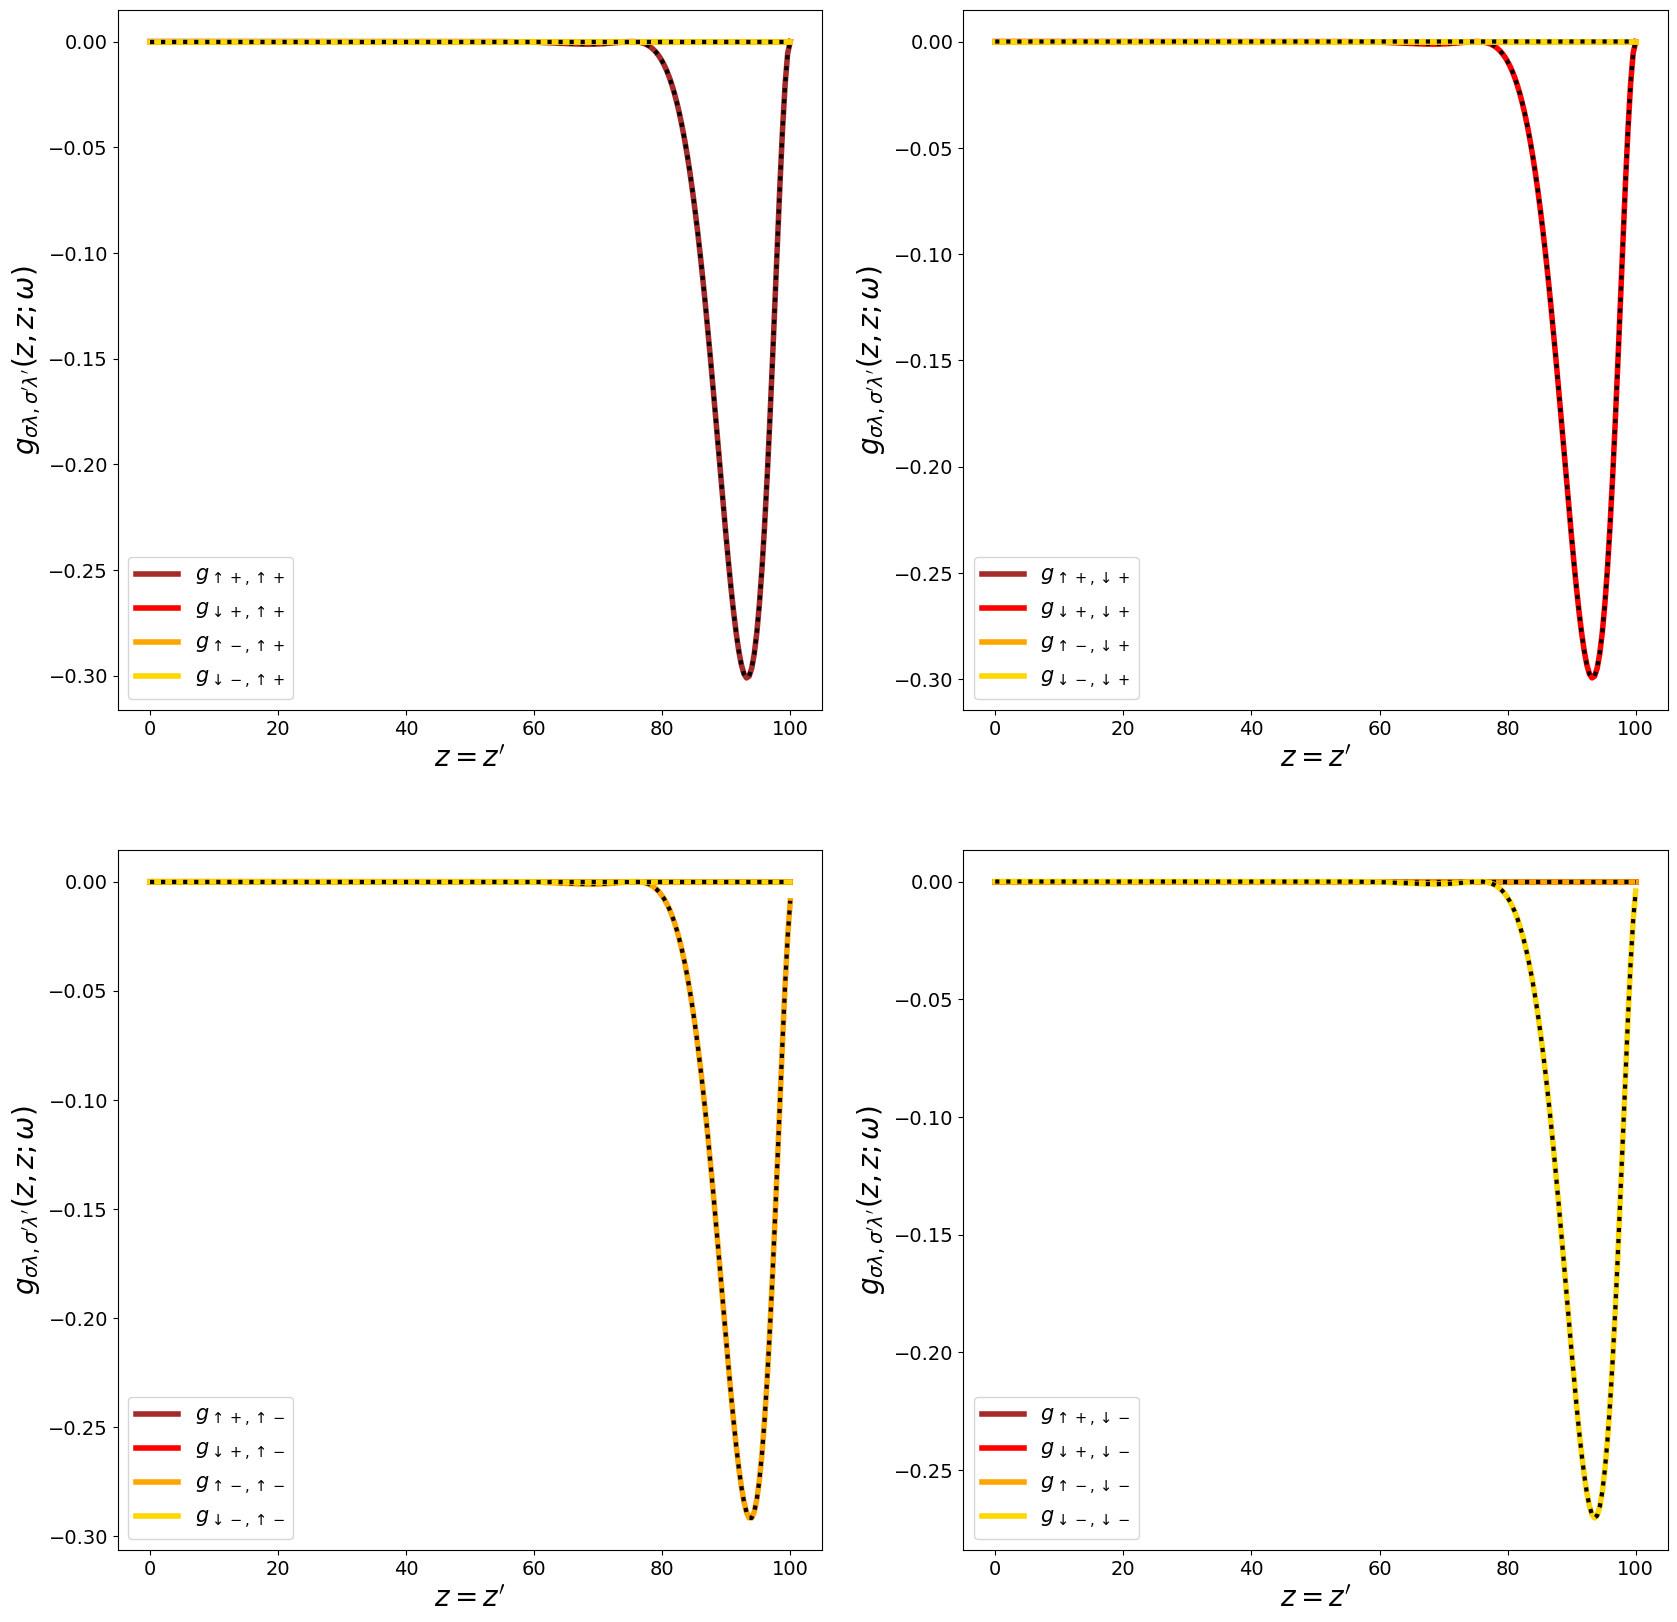

In [9]:
# colors for plotting
colors = ['brown', 'red', 'orange', 'gold']
# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):
        # plot the G0 analytical
        #axs[iPic][jPic].plot(Z, [G0_zZ[idx][irow][icol].real for idx in range(len(Z))], c=colors[irow], lw=2, ls=':') 
        
        # plot the G2 analytical
        axs[iPic][jPic].plot(Z, [G2_zZ[idx][irow][icol].real for idx in range(len(Z))], c=colors[irow], lw=4, label=labels[irow][icol]) 
        
        # plot the G2 numerical (trick)
        axs[iPic][jPic].plot(Z, [G2_zZ_trick[idx][irow][icol].real for idx in range(len(Z))], c='black', lw=3, ls=':')
    
    axs[iPic][jPic].set_xlabel("$z=z'$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

#### <font color='green'> **Imaginary Part** </font> 

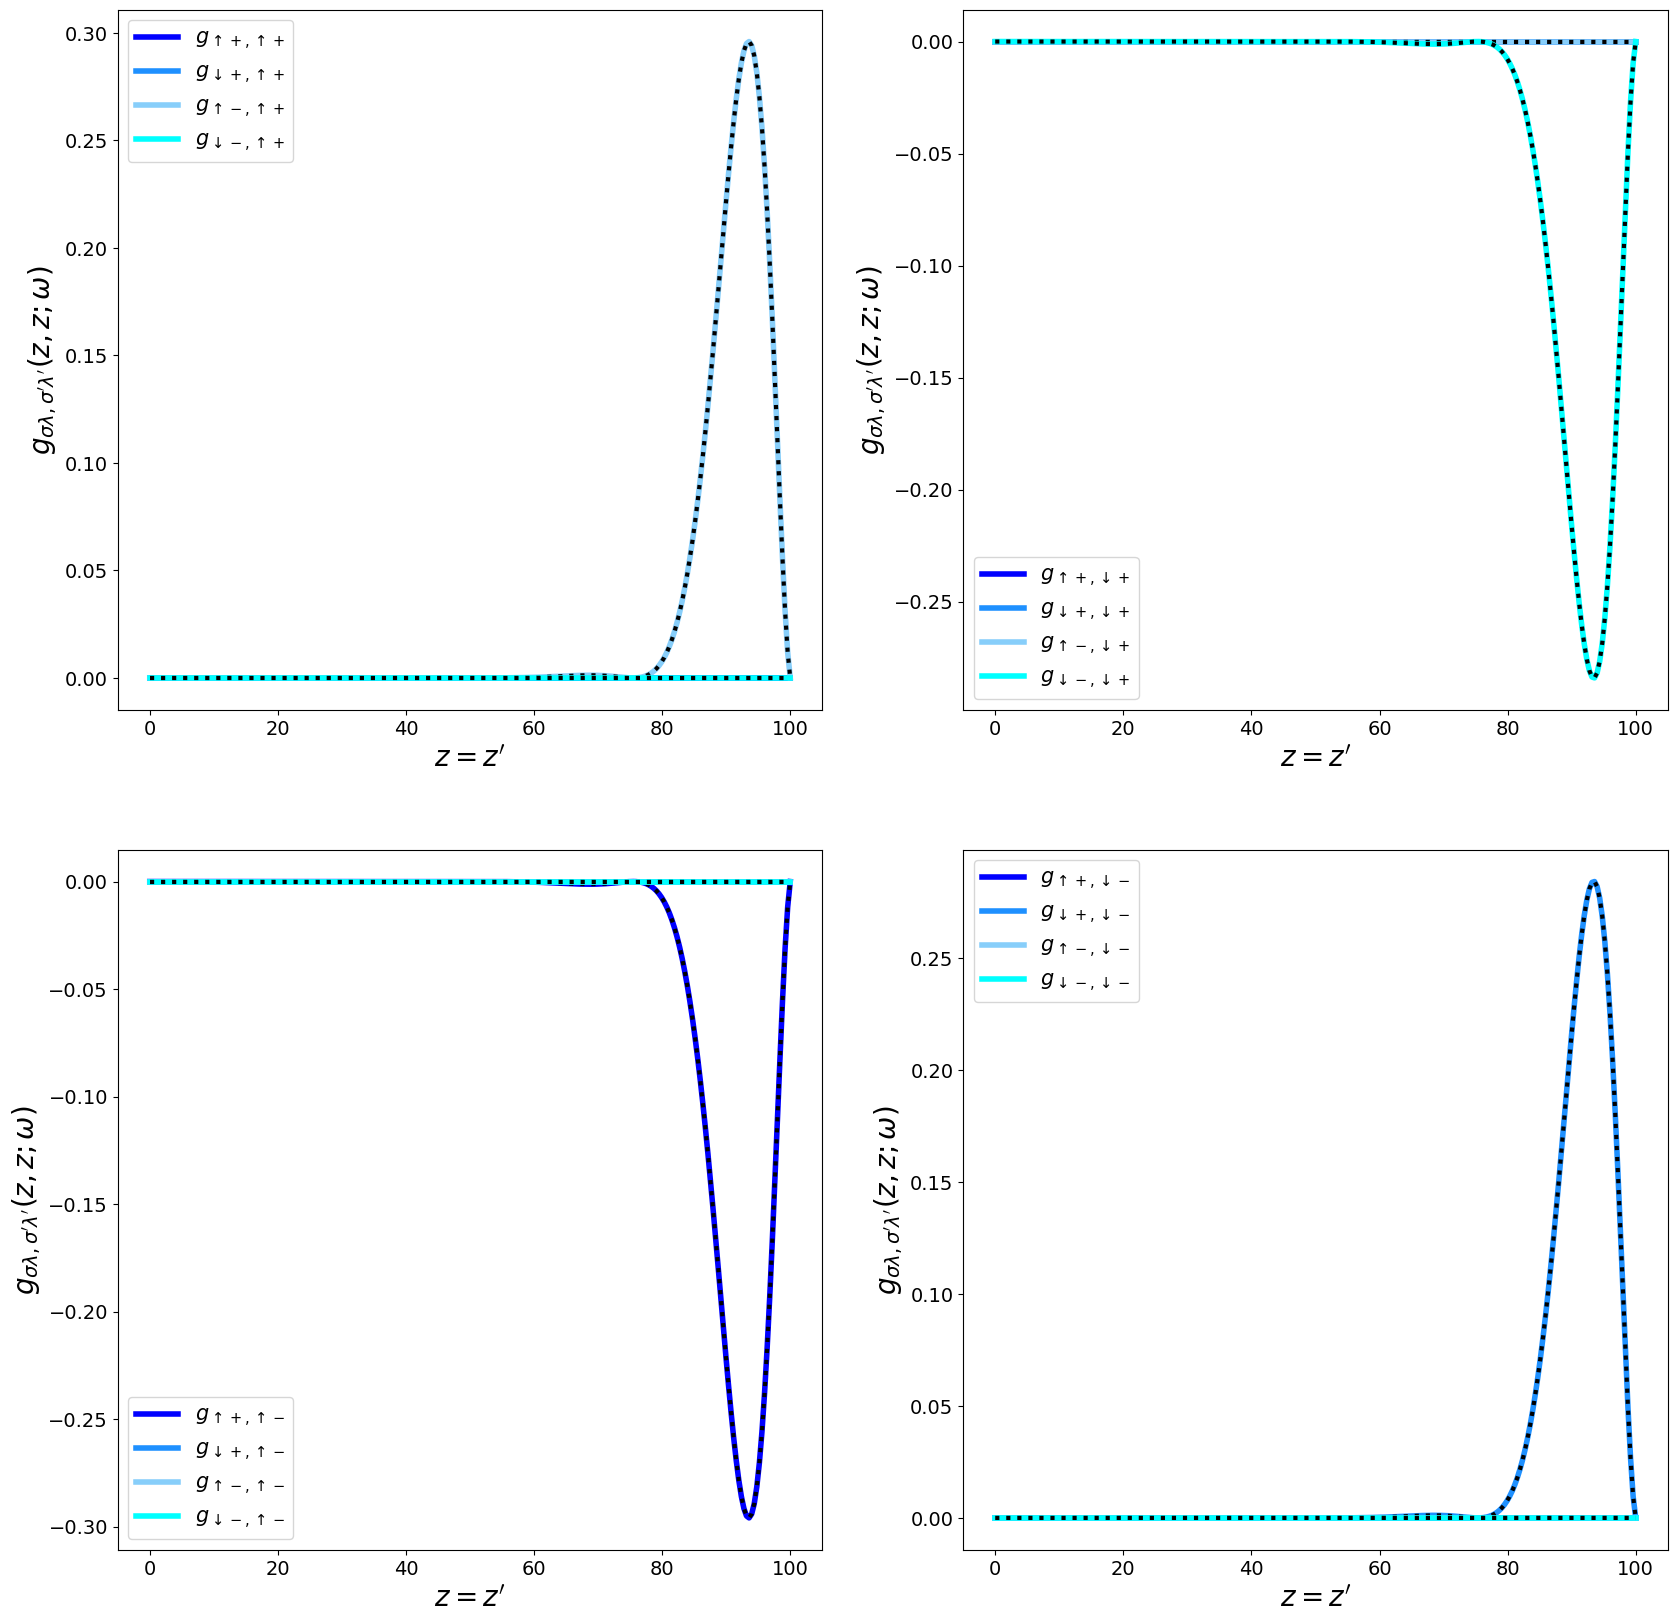

In [10]:
# colors for plotting
colors = ['blue','dodgerblue','lightskyblue','cyan']
# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):
        # plot the G0 analytical
        #axs[iPic][jPic].plot(Z, [G0_zZ[idx][irow][icol].imag for idx in range(len(Z))], c=colors[irow], lw=2, ls=':') 
        
        # plot the G2 analytical
        axs[iPic][jPic].plot(Z, [G2_zZ[idx][irow][icol].imag for idx in range(len(Z))], c=colors[irow], lw=4, label=labels[irow][icol]) 
        
        # plot the G2 numerical (trick)
        axs[iPic][jPic].plot(Z, [G2_zZ_trick[idx][irow][icol].imag for idx in range(len(Z))], c='black', lw=3, ls=':')
    
    axs[iPic][jPic].set_xlabel("$z=z'$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

### **Anomalous Green's function**


With the above assumption on the tunneling coupling, the second-order correction to the anomalous Green's function becomes
$$
\begin{split}
    \mathcal{F}^{\dagger \, (2)}_{MTI}(z,z'; \omega) 
    &=
    \int dz_1 \, dz_1' \, dz_2 \, dz_2' \,
    \left\lbrack \mathcal{G}^{(0)}_{MTI}(z_1,z; -\omega) \right\rbrack^T
    \Gamma^{\star}(z_1',z_1)
    \mathcal{F}^{\dagger \, (0)}_{SC}(z_1',z_2';\omega)
    \Gamma^{\dagger}(z_2',z_2) 
    \mathcal{G}^{(0)}_{MTI}(z_2,z'; \omega) = \\[5pt]
    %
    &=
    \int dz_1 \, dz_1' \, dz_2 \, dz_2' \;
    \delta(z_1-z_1') \delta(z_1-z_0) \delta(z_2-z_2') \delta(z_2-z_0) 
    \left\lbrack \mathcal{G}^{(0)}_{MTI}(z_1,z; -\omega) \right\rbrack^T
    \Gamma^{\star}
    \mathcal{F}^{\dagger \, (0)}_{SC}(z_1',z_2';\omega)
    \Gamma^{\dagger}
    \mathcal{G}^{(0)}_{MTI}(z_2,z'; \omega) = \\[5pt]
    %
    &=
    \int dz_1 \, dz_2 \, \;
    \delta(z_1-z_0) \delta(z_2-z_0) 
    \left\lbrack \mathcal{G}^{(0)}_{MTI}(z_1,z; -\omega) \right\rbrack^T
    \Gamma^{\star}
    \mathcal{F}^{\dagger \, (0)}_{SC}(z_1,z_2;\omega)
    \Gamma^{\dagger}
    \mathcal{G}^{(0)}_{MTI}(z_2,z'; \omega) = \\[5pt]
    %
    &= 
    \left\lbrack \mathcal{G}^{(0)}_{MTI}(z_0,z; -\omega) \right\rbrack^T
    \Gamma^{\star}
    \mathcal{F}^{\dagger \, (0)}_{SC}(0;\omega)
    \Gamma^{\dagger}
    \mathcal{G}^{(0)}_{MTI}(z_0,z'; \omega)
\end{split}
$$
where it is worth noting that in general the unperturbed Green's functions $\left\lbrack \mathcal{G}^{(0)}_{MTI}(z_0,z; -\omega) \right\rbrack^T$ and $\mathcal{G}^{(0)}_{MTI}(z_0,z'; \omega)$ are non-vanishing for $z_0=0$ and $z_0=d$ with the chosen boundary conditions.
Therefore, the second order correction for the anomalous propagator reduces to the matrix product 
$$
\boxed{
    \mathcal{F}_{MTI}^{\dagger \, (2)}(z,z'; \omega)
    =
    \left\lbrack \mathcal{G}^{(0)}_{MTI}(z_0,z; -\omega) \right\rbrack^T
    \Gamma^{\star}
    \mathcal{F}^{\dagger \, (0)}_{SC}(0;\omega)
    \Gamma^{\dagger}
    \mathcal{G}^{(0)}_{MTI}(z_0,z'; \omega)
} \,.
$$

In [20]:
# Function evaluating the F2 with analytical formula
def FMTI2_analytical(d, z, Z, z0, L, mu, Delta, omega, Gamma, C0 = -0.0068, D1 = 1.3, A1 = 2.2, M0 = 0.28, B1 = 10, t=1., hbar = 1.):

    # GMTI(z0,z)
    GMTIz = GMTI_analytical(d=d, z=z0, Z=z, L=L, omega=-omega, C0=C0, D1=D1, A1=A1, M0=M0, B1=B1, hbar=hbar)
    
    # GMTI(z0,z')
    GMTIZ = GMTI_analytical(d=d, z=z0, Z=Z, L=L, omega=omega, C0=C0, D1=D1, A1=A1, M0=M0, B1=B1, hbar=hbar)
    
    # FSC(0)
    FSC = FSC_matrix(z=0., kx=0., ky=0., mu=mu, Delta=Delta, w=omega, t=t, hbar=hbar)
    
    return (np.transpose(GMTIz) @ np.conj(Gamma) @ FSC @ Gamma.H @ GMTIZ).A


# Function evaluating the F2 with numerical (trick) method
def FMTI2_modifiedBC(d, z, Z, z0, kx, ky, L, mu, Delta, omega, Gamma, C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6, t=1., hbar = 1.):

    # GMTI(z0,z)
    GMTIz = GMTI_modifiedBC(d=d, z=z0, Z=z, kx=kx, ky=ky, L=L, w=-omega, C=C, D1=D1, D2=D2, A1=A1, A2=A2, M=M, B1=B1, B2=B2, hbar=hbar)
    
    # GMTI(z0,z')
    GMTIZ = GMTI_modifiedBC(d=d, z=z0, Z=Z, kx=kx, ky=ky, L=L, w=omega, C=C, D1=D1, D2=D2, A1=A1, A2=A2, M=M, B1=B1, B2=B2, hbar=hbar)

    # FSC(0)
    FSC = FSC_matrix(z=0., kx=kx, ky=ky, mu=mu, Delta=Delta, w=omega, t=t, hbar=hbar)
    
    return (np.transpose(GMTIz) @ Gamma @ FSC @ Gamma.H @ GMTIZ).A


# parameters
d = 100.; mu = 0.010; Delta = 0.005; omega = 0.0025; L = 0.005; z0 = 50.
# coupling matrices
Gamma = np.matrix([[1,0],[0,1],[1,0],[0,1]])

Z = np.linspace(0., d, 250)
# F2 computed analytically
F2_zZ_analytical = np.array([FMTI2_analytical(d=d, z=z, Z=z, z0=z0, L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma) for z in Z])
# F2 computed numerically (trick)
F2_zZ_numerical = np.array([FMTI2_modifiedBC(d=d, z=z, Z=z, z0=z0, kx=0.006, ky=0.002, L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma) for z in Z])

#### <font color='green'> **Absolute Value** </font> 

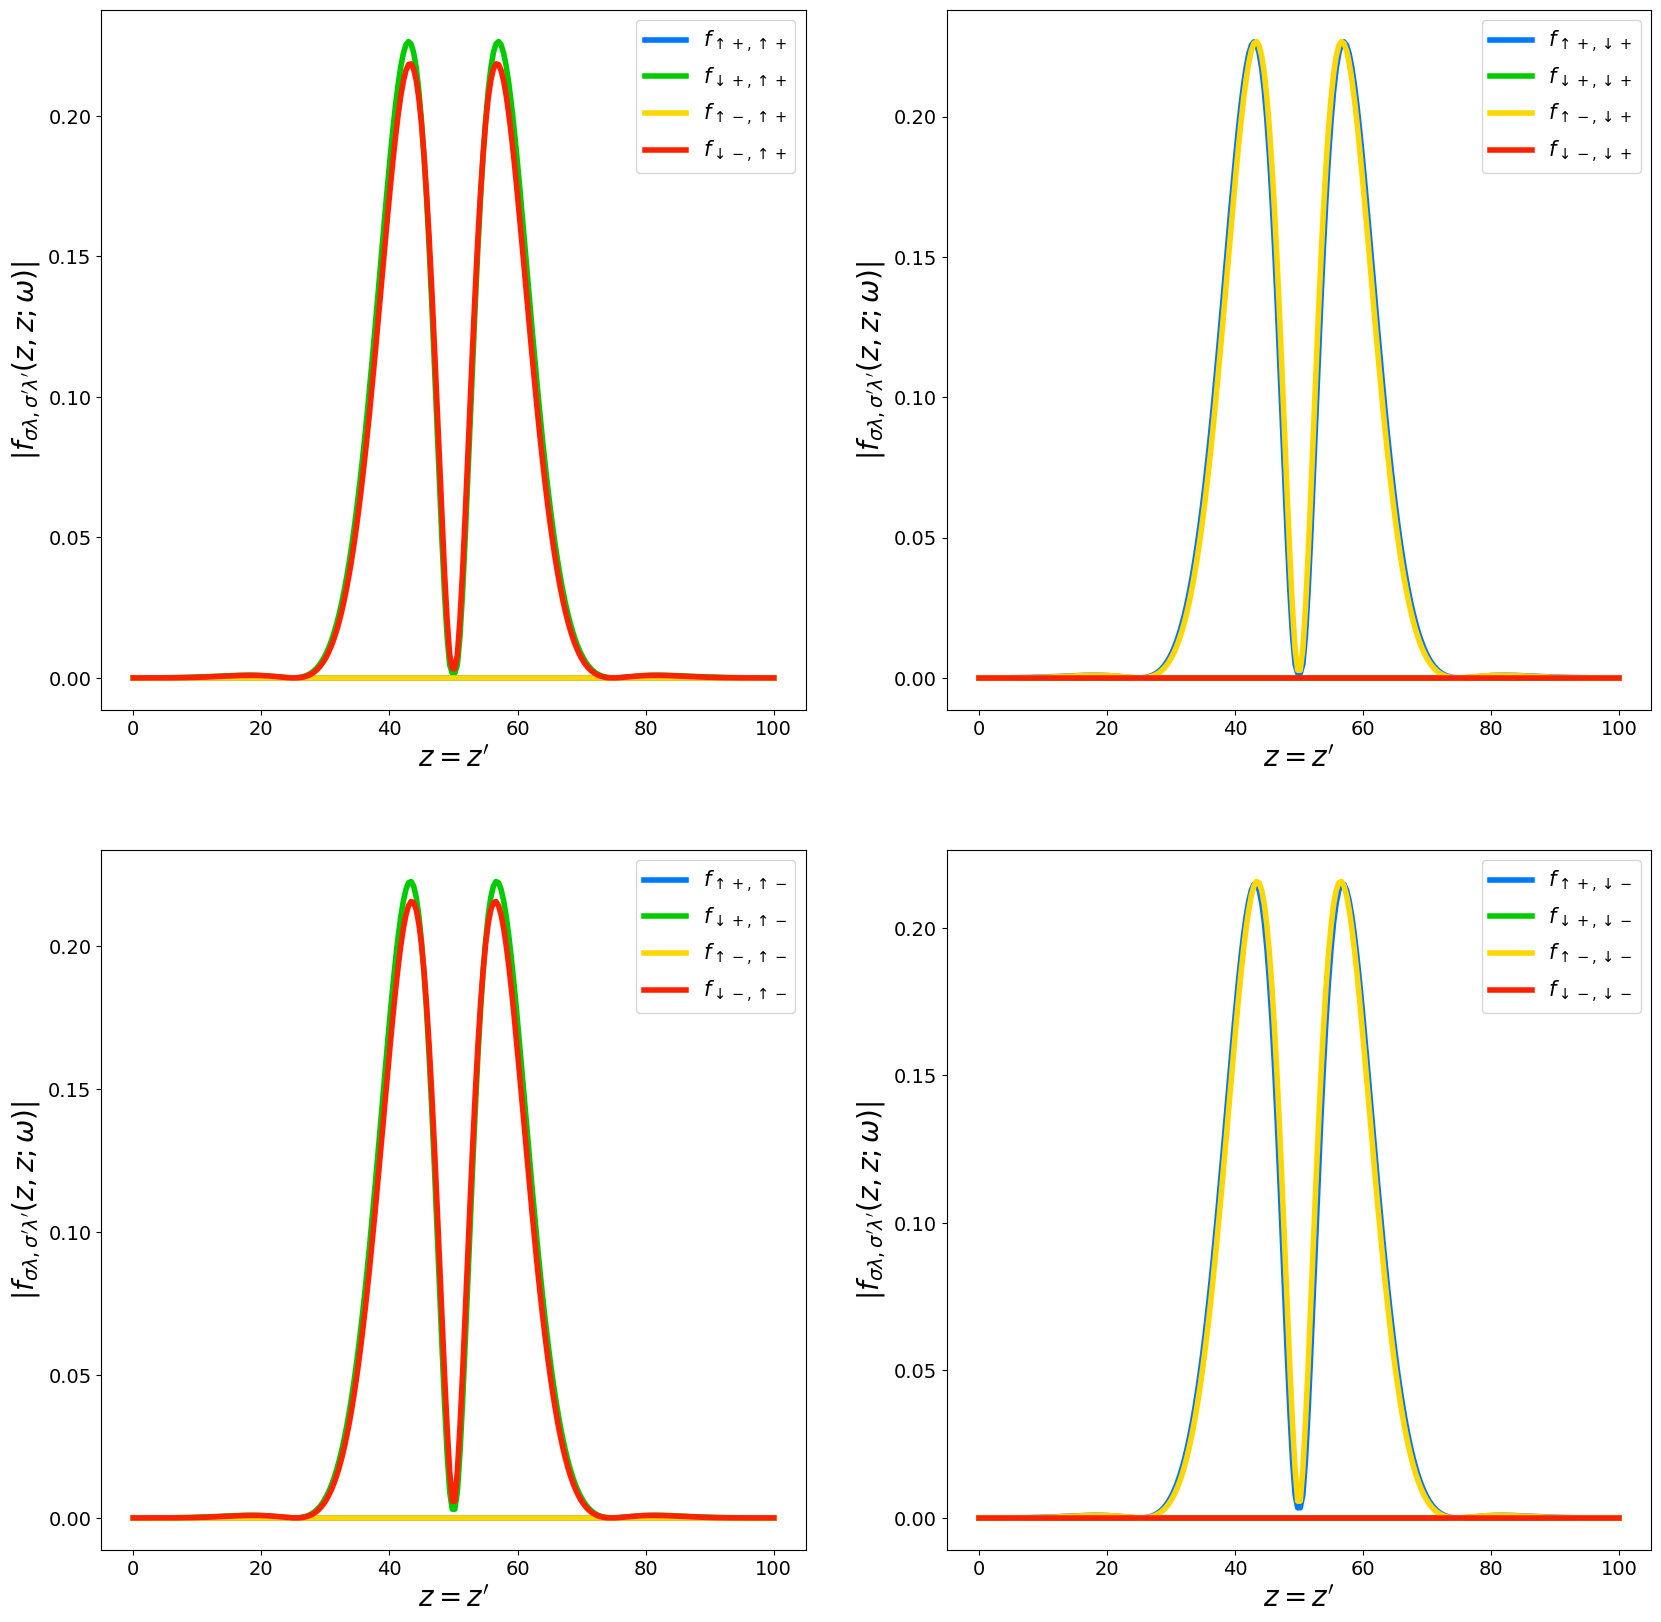

In [21]:
# colors for plotting
colors = ["#0077FF", "#00CC00", "#FFD700", "#FF2200",]
# labels for curves
labels = [["$f_{\\uparrow +, \\uparrow +}$", "$f_{\\uparrow +, \downarrow +}$", "$f_{\\uparrow +, \\uparrow -}$", "$f_{\\uparrow +, \downarrow -}$"],
          ["$f_{\downarrow +, \\uparrow +}$", "$f_{\downarrow +, \downarrow +}$", "$f_{\downarrow +, \\uparrow -}$", "$f_{\downarrow +, \downarrow -}$"],
          ["$f_{\\uparrow -, \\uparrow +}$", "$f_{\\uparrow -, \downarrow +}$", "$f_{\\uparrow -, \\uparrow -}$", "$f_{\\uparrow -, \downarrow -}$"],
          ["$f_{\downarrow -, \\uparrow +}$", "$f_{\downarrow -, \downarrow +}$", "$f_{\downarrow -, \\uparrow -}$", "$f_{\downarrow -, \downarrow -}$"]]


# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):      
        # plot the F2 analytical
        axs[iPic][jPic].plot(Z, [abs(F2_zZ_analytical[idx][irow][icol]) for idx in range(len(Z))], lw=4, c=colors[irow], label=labels[irow][icol]) 
        
        # plot the F2 numerical (trick)
        #axs[iPic][jPic].plot(Z, [abs(F2_zZ_numerical[idx][irow][icol]) for idx in range(len(Z))], c=colors[irow], label=labels[irow][icol])
    
    axs[iPic][jPic].set_xlabel("$z=z'$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$|f_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)|$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

#### <font color='green'> **Frequency Plot** </font> 

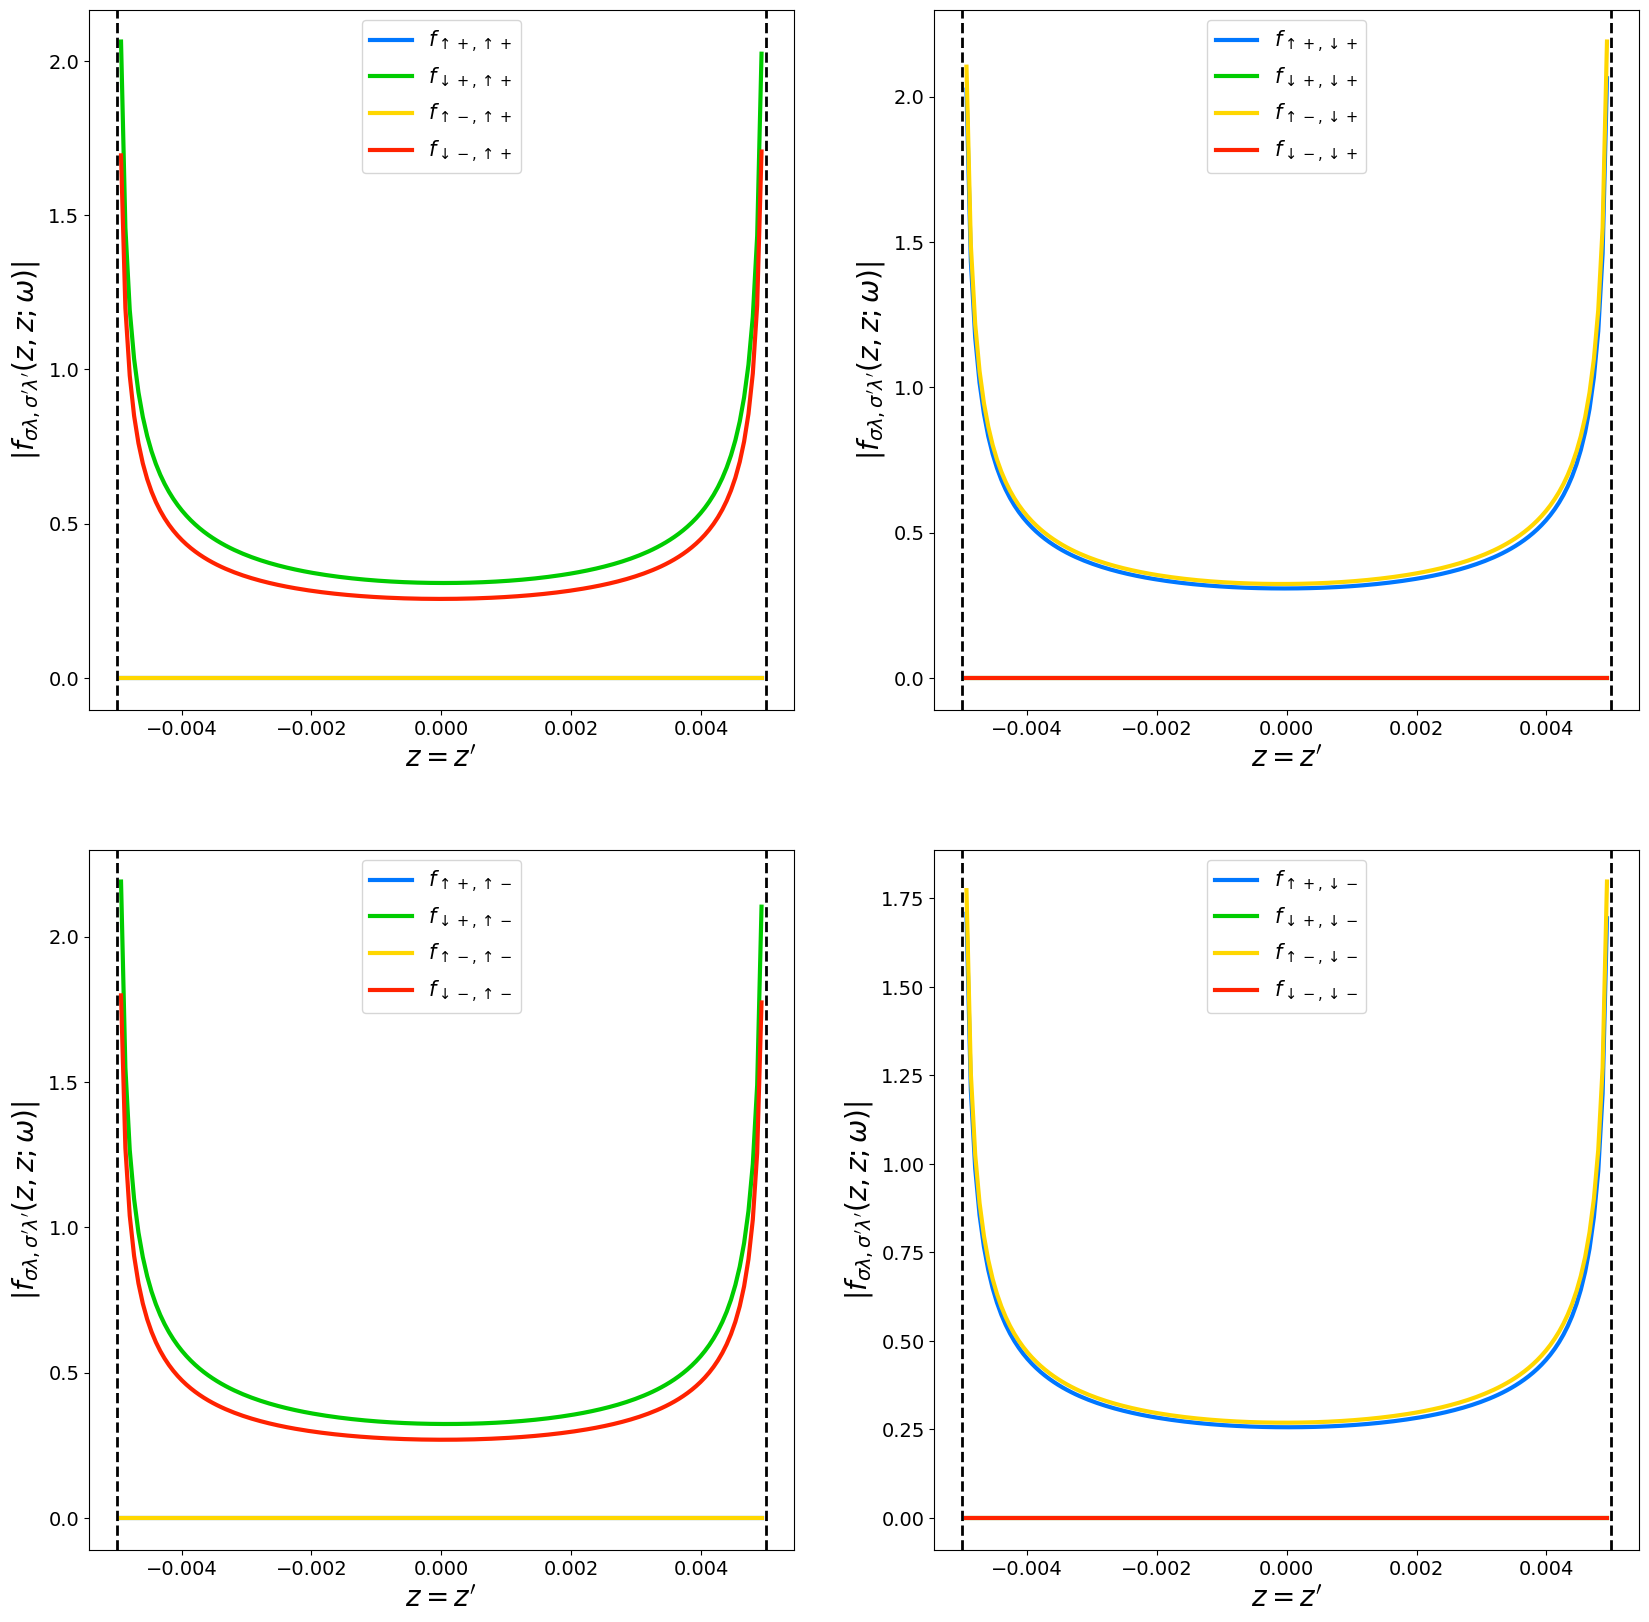

In [111]:
# parameters
d = 100.; mu = 0.010; Delta = 0.005; L=0.050; zfix=10.; z0 = 0.
# coupling matrices
Gamma = np.matrix([[1,0],[0,1],[1,0],[0,1]])

omega = np.linspace(-Delta, Delta, 150)
# F2 Zeeman 0
F2_omega = np.array([FMTI2_analytical(d=d, z=zfix, Z=zfix, z0=z0, L=L, mu=mu, Delta=Delta, omega=ene, Gamma=Gamma) for ene in omega])

# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):

        # F2 Zeeman 0
        axs[iPic][jPic].plot(omega, [abs(F2_omega[idx][irow][icol]) for idx in range(len(omega))], lw=3, c=colors[irow], label=labels[irow][icol]) 
            
    axs[iPic][jPic].axvline(x=Delta, color='black', ls='--', lw=2)
    axs[iPic][jPic].axvline(x=-Delta, color='black', ls='--', lw=2)

    
    axs[iPic][jPic].set_xlabel("$z=z'$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$|f_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)|$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);